# Increase the learning rate and also the size of the training set to see the bump move.

In [24]:
import sys
import os
sys.path.append('Jerome_scripts_Original/PGM/')
sys.path.append('selfPackages/')
sys.path.append('Jerome_scripts_Original/')
sys.path.append('ffmpeg-3.4.2-32bit-static/')

import numpy as np
import scipy as sc
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

try:
    import rbm
    import bm
except:
    print 'Compiling cy_utilities first'
    curr_dir = os.getcwd()
    os.chdir('PGM/')
    !python setup.py build_ext --inplace
    print 'Compilation done'
    os.chdir(curr_dir)
    
import pickle
from ising import IsingModel
import estimate_correlations_ising
from sklearn.utils import shuffle
import inlineMovies

In [ ]:
import dill
dill.dump_session('./data_bruckner/data/notebookData/17_BumpMove_High_learningRate')

In [ ]:
import dill
dill.load_session('./data_bruckner/data/notebookData/17_BumpMove_High_learningRate')

In [ ]:
%%capture capt1
#Supress the output of the cell and save it to capt1

N = 100
beta = 1.
Num_configs = 10000

#Generate spins using Gibbs Sampling MCMC
BM = bm.BM(N=N,nature='Spin')

#Define Couplings
BM.layer.couplings =  beta* (np.eye(N=N,k=1) + np.eye(N=N,k=-1) )
BM.layer.couplings[0,-1] += beta
BM.layer.couplings[-1,0] += beta

data = BM.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs,Nstep=200) # N steps.

#Train the model
RBM = rbm.RBM(visible = 'Spin', n_v=N, n_h = 20, hidden = 'Spin',zero_field = True)
results = RBM.fit(data,n_iter=250,verbose=0,learning_rate = 0.05,record=['W'],record_interval=1000,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False);

In [104]:
#from ffmpeg import ffmpeg 
#from ffmpy import FFmpeg
import inlineMovies
#reload(inlineMovies)
inlineMovies.generatePlot(Ydata=np.array(results['W']),Xdata=None,xlim=None,ylim=None,frames=None,interval=20)

ValueError: I/O operation on closed file

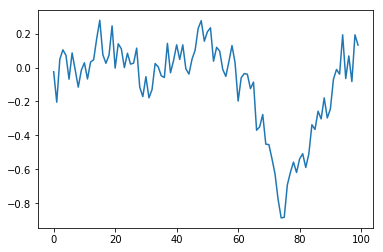

In [112]:
plt.plot(np.array(results['W'])[-1,0,:])

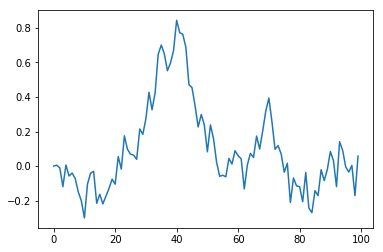

In [113]:
plt.plot(np.array(results['W'])[-1,1,:])

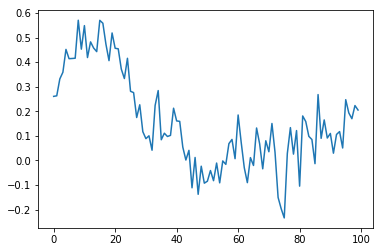

In [114]:
plt.plot(np.array(results['W'])[-1,2,:])

## Find the peak by absloute max value and check the time evolution:

In [115]:
peakCentre = np.zeros([np.shape(np.array(results['W']))[0],np.shape(np.array(results['W']))[1]])
peakCentre = np.argmax(abs(np.array(results['W'])),axis=2)

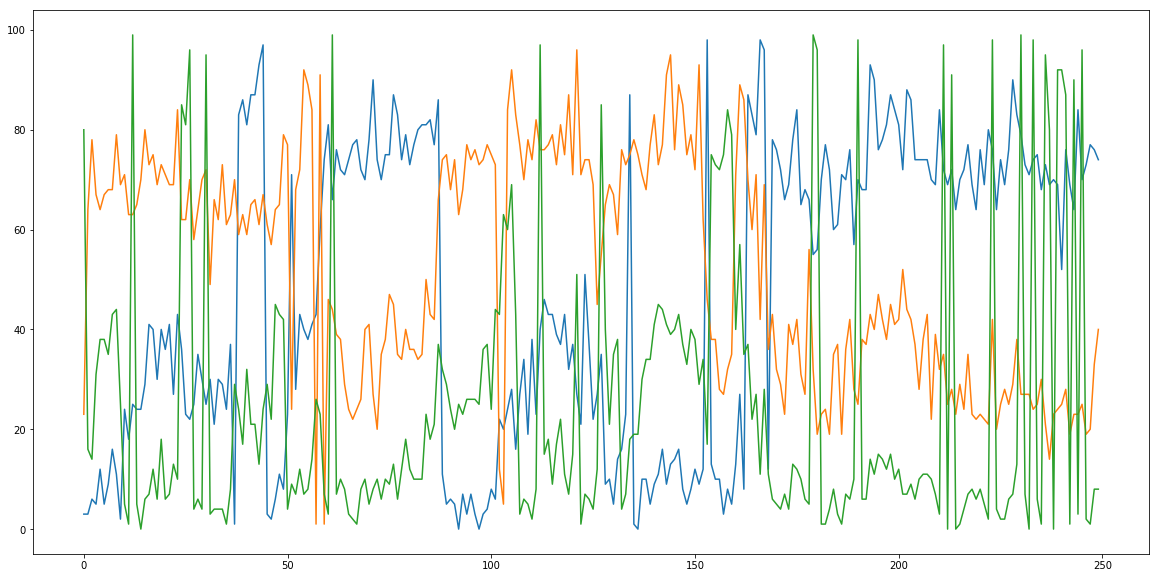

In [116]:
plt.figure(figsize=(20,10))
plt.plot(peakCentre[:])

In [117]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [118]:
import peakDistance
reload(peakDistance)
peakDis = np.zeros([np.shape(np.array(results['W']))[0],np.shape(np.array(results['W']))[1]])

for i in np.arange(np.shape(peakCentre)[0]):
    peakDis[i,0] = peakDistance.peakDistance(peakCentre[i,0],peakCentre[i,1],100)
    peakDis[i,1] = peakDistance.peakDistance(peakCentre[i,0],peakCentre[i,2],100)
    peakDis[i,2] = peakDistance.peakDistance(peakCentre[i,1],peakCentre[i,2],100)

N = 20
smooth0 = running_mean(peakDis[:,0],N)
smooth1 = running_mean(peakDis[:,1],N)
smooth2 = running_mean(peakDis[:,2],N)

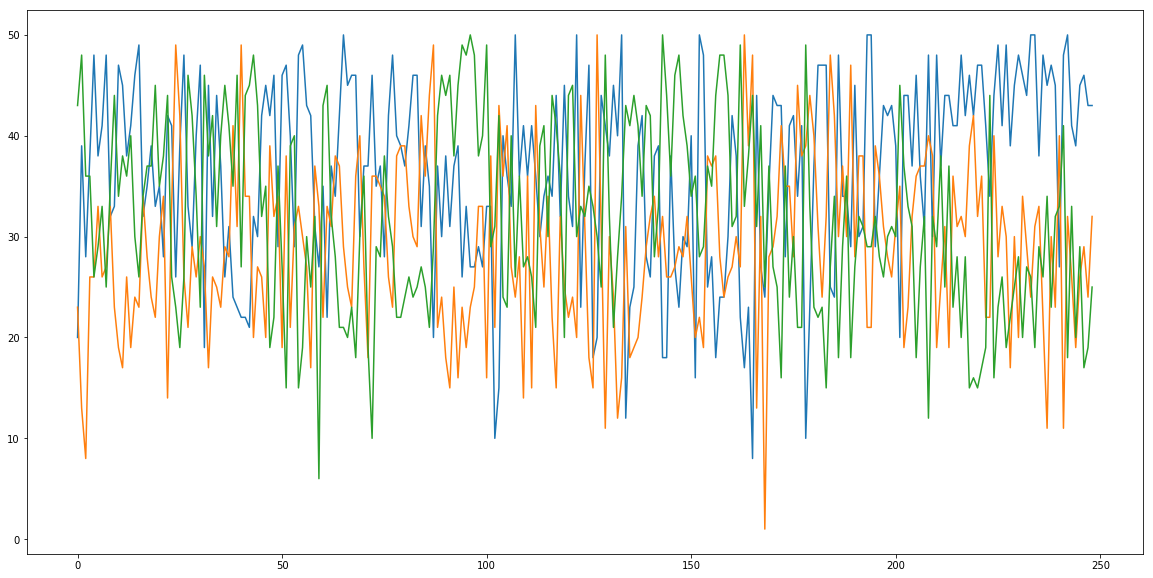

In [119]:
plt.figure(figsize=(20,10))
plt.plot(peakDis[0:-1,:])

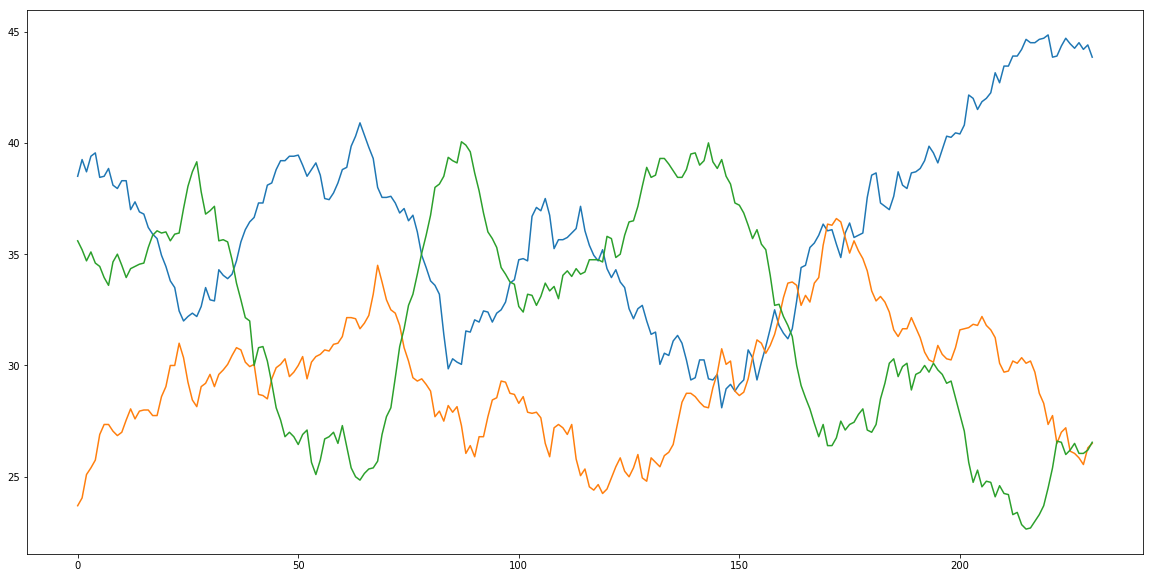

In [120]:
plt.figure(figsize=(20,10))
plt.plot(smooth0)
plt.plot(smooth1)
plt.plot(smooth2)